# Overfitting demo

## Create a dataset based on a true sinusoidal relationship

Let's look at a synthetic dataset consisting of 30 points drawn from the sinusoid y = sin(4x):

In [1]:
import graphlab
import math
import random
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Create random values for x in interval[0, 1]

In [2]:
random.seed(98103)
n = 30
x = graphlab.SArray([random.random() for i in range(n)]).sort()

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\Xiaoning\AppData\Local\Temp\graphlab_server_1544759719.log.0


This non-commercial license of GraphLab Create for academic use is assigned to lxn1021@gmail.com and will expire on November 18, 2019.


Compute y

In [4]:
y = x.apply(lambda x: math.sin(4*x))

Add random Gaussian noise to y

In [6]:
random.seed(1)
e = graphlab.SArray([random.gauss(0, 1.0/3.0) for i in range(n)])
y = y + e

## Put data into an SFrame to manipulate later

In [7]:
data = graphlab.SFrame({"X1": x, "Y": y})

In [8]:
data

X1,Y
0.0395789449501,0.587050191026
0.0415680996791,0.648655851372
0.0724319480801,0.307803309485
0.150289044622,0.310748447417
0.161334144502,0.237409625496
0.191956312795,0.705017157224
0.232833917145,0.461716676992
0.259900980166,0.383260507851
0.380145814869,1.06517691429
0.432444723508,1.03184706949


## Create a function to plot the data, since we'll do it many times

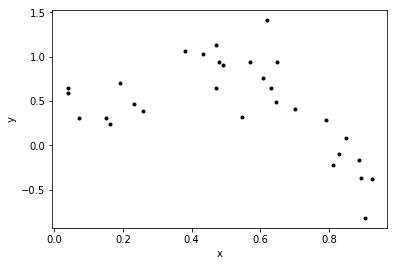

In [9]:
def plot_data(data):
    plt.plot(data["X1"], data["Y"], "k.")
    plt.xlabel("x")
    plt.ylabel("y")
    
plot_data(data)

## Define some useful polynomial regression functions

Define a function to create our features for a polynomial regression model of any degree:

In [10]:
def polynomial_features(data, deg):
    data_copy = data.copy()
    
    for i in range(1, deg):
        data_copy["X" + str(i+1)] = data_copy["X" + str(i)] * data_copy["X1"]
        
        
    return data_copy

Define a function to fit a polynomial linear regression model of degree "deg" to the data in "data":

In [14]:
def polynomial_regression(data, deg):
    model = graphlab.linear_regression.create(polynomial_features(data, deg), target = "Y", l2_penalty = 0., l1_penalty = 0., 
                                             validation_set = None, verbose = False)

    return model

Define function to plot data and predictions made, since we are going to use it many times:

In [23]:
def plot_poly_predictions(data, model):
    plot_data(data)
    
    deg = len(model.coefficients["value"]) - 1
    
    x_pred = graphlab.SFrame({"X1": [i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred, deg))
    
    plt.plot(x_pred["X1"], y_pred, "g-", label = "degree " + str(deg) + " fit")
    plt.legend(loc = "upper left")
    plt.axis([0, 1, -1.5, 2])
    
    plt.show()

Create a function that prints the polynomial coefficients in a pretty way:

In [16]:
def print_coefficients(model):
    deg = len(model.coefficients["value"]) - 1
    
    w = list(model.coefficients["value"])
    
    print "Learned polynomial for degree " + str(deg) + ":"
    w.reverse()
    print np.poly1d(w)

## Fit a degree-2 polynomial

Fit our degree-2 polynomial to the data generated above:

In [17]:
model = polynomial_regression(data, deg = 2)

Inspect learned parameters

In [18]:
print_coefficients(model)

Learned polynomial for degree 2:
        2
-5.129 x + 4.147 x + 0.07471


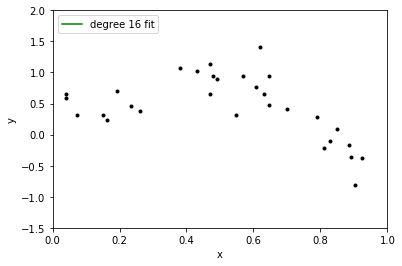

In [24]:
plot_poly_predictions(data, model)

## Fit a degree-4 polynomial

Learned polynomial for degree 4:
       4         3         2
23.87 x - 53.82 x + 35.23 x - 6.828 x + 0.7755


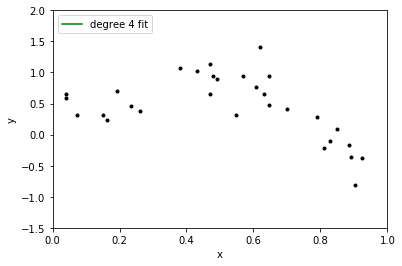

In [20]:
model = polynomial_regression(data, deg = 4)
print_coefficients(model)
plot_poly_predictions(data, model)

## Fit a degree-16 polynomial

In [21]:
model = polynomial_regression(data, deg = 16)
print_coefficients(model)

Learned polynomial for degree 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


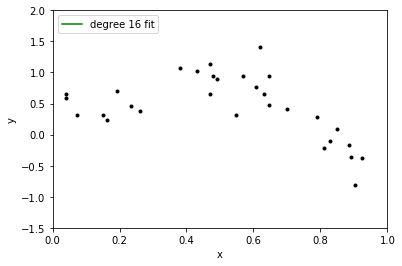

In [22]:
plot_poly_predictions(data, model)